In [108]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [109]:
all_outputs = os.listdir("grammar_outputs/wilcox_replication")
basic_outputs = [output_file for output_file in all_outputs if "basic" in output_file]
basic_effects = []
for output_filename in basic_outputs:
    construction_data = json.load(open(os.path.join("grammar_outputs", "wilcox_replication",output_filename)))
    stim_id = 1
    # get model/construction (subj obj or pp) from filenames
    model_name = output_filename.split(".json")[0][-4:]
    construction_name = output_filename.split(".json")[0].split("_")[1]
    for stim_set in construction_data:
        basic_effects.append({
            "item": stim_id,
            "model": model_name,
            "test": construction_name,
            "gap": "gap",
            "wh_effect": stim_set['s_ab']['critical_surprisal'] - stim_set['s_xb']['critical_surprisal']
        })
        basic_effects.append({
                        "item": stim_id,
            "model": model_name,
            "test": construction_name,
            "gap": "nogap",
            "wh_effect": stim_set['s_ax']['critical_surprisal'] - stim_set['s_xx']['critical_surprisal']
        })
        stim_id +=1


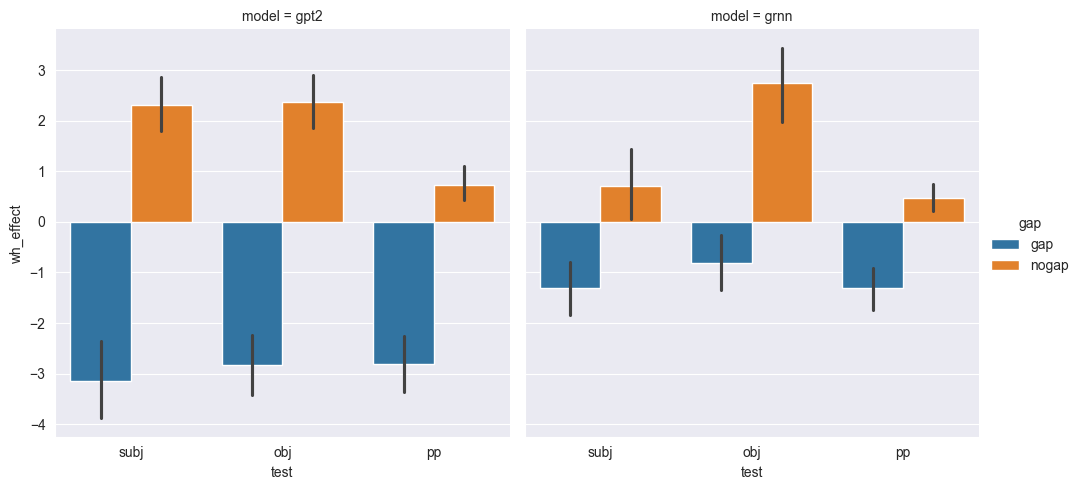

In [111]:
basic_effects = pd.DataFrame(basic_effects)
avg = basic_effects.groupby(['model', 'test', 'gap']).agg("mean")
avg = avg.reset_index()
sns.catplot(x="test", y="wh_effect", hue="gap", data=basic_effects, kind="bar", col = "model",
            estimator="mean")

Plotting the Island data

In [112]:
from generate_corpora import corpus_from_json

(-5.0, 5.0)

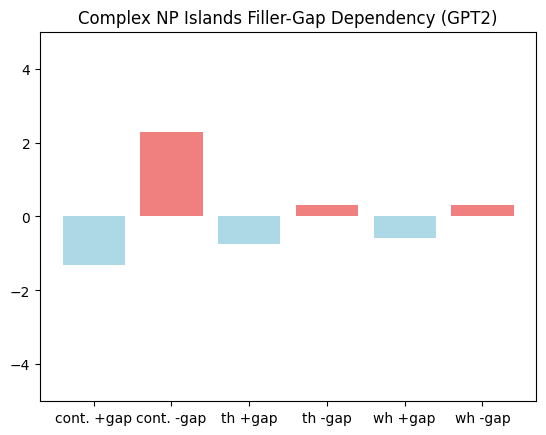

In [66]:
obj_tuples = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_obj_grnn.json", is_tuples = True)
wh_tuples = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_wh_grnn.json", is_tuples = True)
that_tuples = corpus_from_json("grammar_outputs/wilcox_replication/island_cnp_that_grnn.json", is_tuples = True)

def island_effects_for_model(model_name):
    obj_tuples = corpus_from_json(f"grammar_outputs/wilcox_replication/island_cnp_obj_{model_name}.json", is_tuples = True)
    wh_tuples = corpus_from_json(f"grammar_outputs/wilcox_replication/island_cnp_wh_{model_name}.json", is_tuples = True)
    that_tuples = corpus_from_json(f"grammar_outputs/wilcox_replication/island_cnp_that_{model_name}.json", is_tuples = True)
    island_effects = []
    for condition, data in zip(("control", "wh-island", "that-island"), (obj_tuples, wh_tuples, that_tuples)):
        for item in data:
            island_effects.append({
                "model": model_name,
                "condition": condition,
                "gap": "gap",
                "wh_effect": item.s_ab.critical_surprisal - item.s_xb.critical_surprisal
            })
            island_effects.append({
                "model": model_name,
                "condition": condition,
                "gap": "nogap",
                "wh_effect": item.s_ax.critical_surprisal - item.s_xx.critical_surprisal
            })
    return island_effects

grnn_cnp_island_effects = island_effects_for_model(obj_tuples, wh_tuples, that_tuples, model_name)


In [ ]:

# extract calculated surprisals from corpus
# obj (control) wh-effects
obj_gap_wh_effects = []
obj_nogap_wh_effects = []
for item in obj_tuples:
    # filler minus no filler
    obj_gap_wh_effects.append(item.s_ab.critical_surprisal - item.s_xb.critical_surprisal)
    obj_nogap_wh_effects.append(item.s_ax.critical_surprisal - item.s_xx.critical_surprisal)

# wh-complement wh-effects
wh_gap_wh_effects = []
wh_nogap_wh_effects = []
for item in wh_tuples:
    # filler minus no filler
    wh_gap_wh_effects.append(item.s_ab.critical_surprisal - item.s_xb.critical_surprisal)
    wh_nogap_wh_effects.append(item.s_ax.critical_surprisal - item.s_xx.critical_surprisal)

# that-complement wh-effects
that_gap_wh_effects = []
that_nogap_wh_effects = []
for item in that_tuples:
    # filler minus no filler
    that_gap_wh_effects.append(item.s_ab.critical_surprisal - item.s_xb.critical_surprisal)
    that_nogap_wh_effects.append(item.s_ax.critical_surprisal - item.s_xx.critical_surprisal)


# plot
plt.bar(
    ("cont. +gap", "cont. -gap", "th +gap", "th -gap", "wh +gap", "wh -gap"),
    (
        np.mean(obj_gap_wh_effects),
        np.mean(obj_nogap_wh_effects),
        np.mean(that_gap_wh_effects),
        np.mean(that_nogap_wh_effects),
        np.mean(wh_gap_wh_effects),
        np.mean(wh_nogap_wh_effects),
    ),
    color=['lightblue', 'lightcoral']
)
plt.title(f"Complex NP Islands Filler-Gap Dependency (GPT2)")
plt.ylim(-5, 5)
    